In [ ]:
if 'google.colab' in str(get_ipython()):
  !pip install openml

In [ ]:
import numpy as np
import pandas as pd
import nltk
import plotly
import re

plotly.offline.init_notebook_mode() # run at the start of every notebook
import cufflinks as cf

cf.go_offline()
cf.getThemes()
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
%matplotlib inline
import random
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
from IPython.display import display

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
# Load data from https://www.openml.org/d/40945
import pandas as pd
import numpy as np
np.random.seed(0)


# Set a random seed for reproducibility
np.random.seed(0)

# Fetch the Titanic dataset from OpenML
# Note: Make sure you have an internet connection to fetch the dataset
X, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#y_train = X_train['survived']
#X_train = X_train.drop('survived', axis=1)y_test = X_test['survived']
#X_test = X_test.drop('survived', axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning:

The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.



In [ ]:
y.columns = ['survived']

In [ ]:
df = pd.concat([X, y], axis=1)
df.head(2)

pclass                            name     sex      age  sibsp  parch  \
0     1.0   Allen, Miss. Elisabeth Walton  female  29.0000    0.0    0.0   
1     1.0  Allison, Master. Hudson Trevor    male   0.9167    1.0    2.0   

   ticket      fare    cabin embarked boat  body  \
0   24160  211.3375       B5        S    2  None   
1  113781  151.5500  C22 C26        S   11   NaN   

                         home.dest survived  
0                     St Louis, MO        1  
1  Montreal, PQ / Chesterville, ON        1

In [ ]:
df.dtypes

pclass        float64
name           object
sex          category
age           float64
sibsp         float64
parch         float64
ticket         object
fare          float64
cabin          object
embarked     category
boat           object
body           object
home.dest      object
survived     category
dtype: object

In [ ]:
df['survived'] = df['survived'].astype('int64')

In [ ]:
df5 = df.copy()

# EDA

In [ ]:
data=df

In [ ]:
data.head(2)

pclass                            name     sex      age  sibsp  parch  \
0     1.0   Allen, Miss. Elisabeth Walton  female  29.0000    0.0    0.0   
1     1.0  Allison, Master. Hudson Trevor    male   0.9167    1.0    2.0   

   ticket      fare    cabin embarked boat  body  \
0   24160  211.3375       B5        S    2  None   
1  113781  151.5500  C22 C26        S   11   NaN   

                         home.dest  survived  
0                     St Louis, MO         1  
1  Montreal, PQ / Chesterville, ON         1

In [ ]:
data.isnull().sum()

pclass          0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
survived        0
dtype: int64

The **Age, Cabin and Embarked** categories have null

How many survived?

<function matplotlib.pyplot.show(close=None, block=None)>

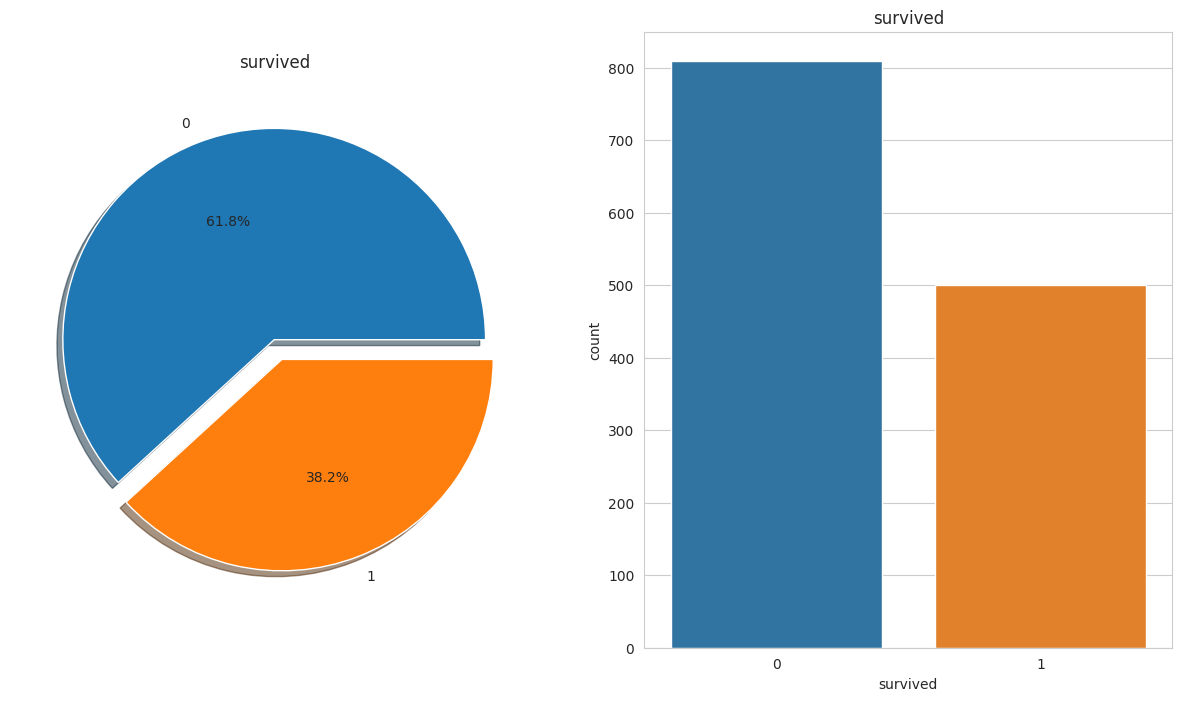

In [ ]:
f, ax = plt.subplots(1,2, figsize = (15,8))
data['survived'].value_counts().plot.pie(explode = [0,0.1], autopct ='%1.1f%%',ax = ax[0], shadow = True)
ax[0].set_title('survived')
ax[0].set_ylabel('')
sns.countplot(x = 'survived', data = data, ax = ax[1])
ax[1].set_title('survived')
plt.show

It is clear that lots of deaths occured.

Only 500 passenger survived out of 890 = 38.4% Survival rate.
Need to dig more into data and see whcih catogeries of people survived more than others.

In [ ]:
data.groupby(['sex', 'survived'])['survived'].count()

sex     survived
female  0           127
        1           339
male    0           682
        1           161
Name: survived, dtype: int64

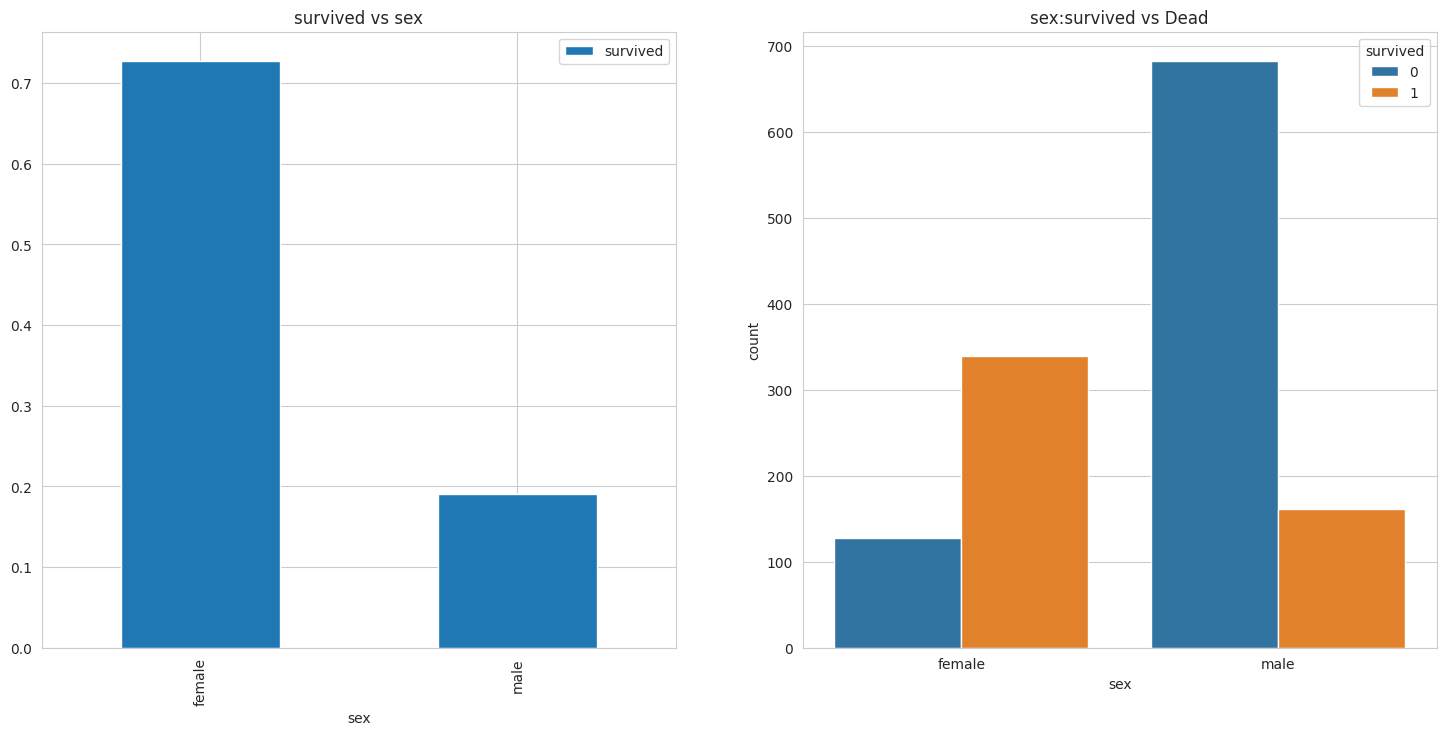

In [ ]:
f, ax = plt.subplots(1, 2, figsize =(18,8))
data[['sex', 'survived']].groupby(['sex']).mean().plot.bar(ax = ax[0])
ax[0].set_title('survived vs sex')
sns.countplot(x = 'sex', hue = 'survived', data = data, ax = ax[1])
ax[1].set_title('sex:survived vs Dead')
plt.show()

Clearly more woman survived than men. It may be important

# Population Class

In [ ]:
pd.crosstab(data.pclass, data.survived, margins = True).style.background_gradient(cmap='summer_r')

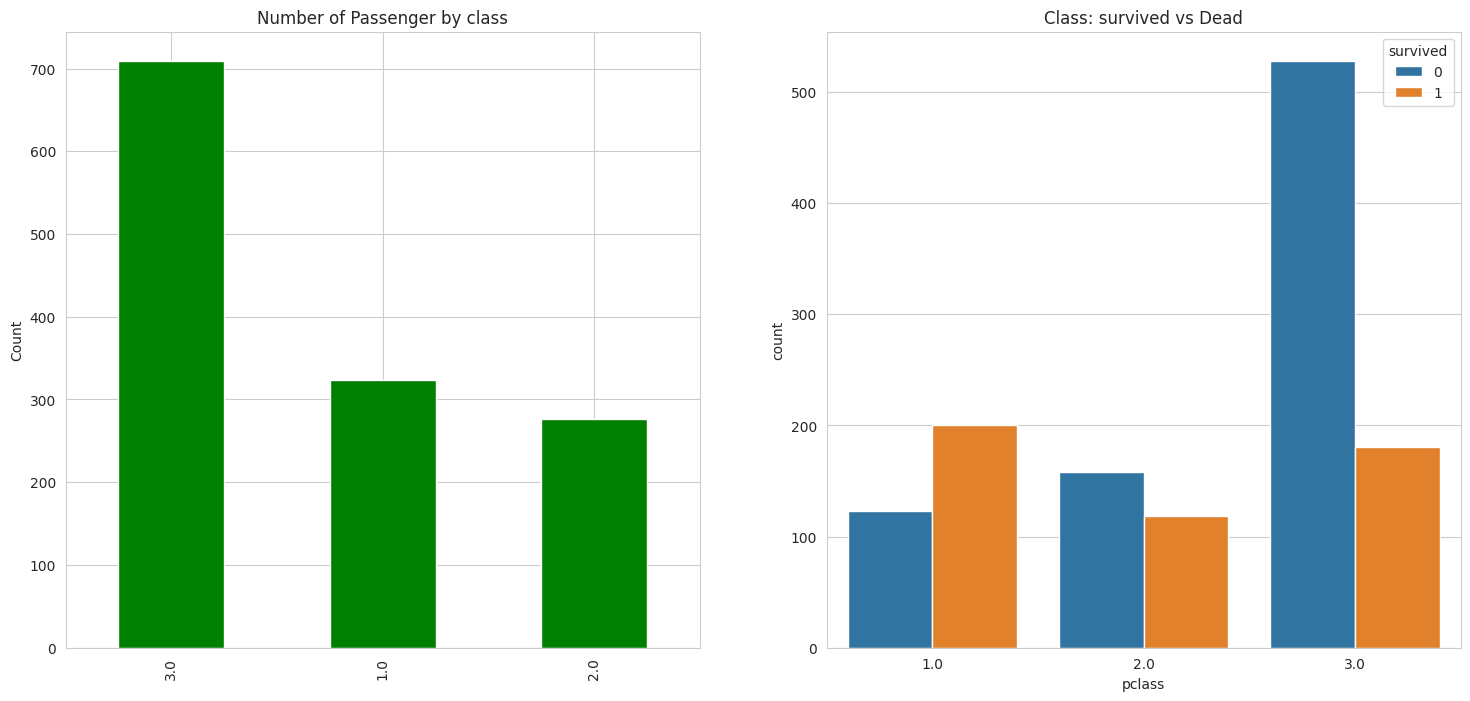

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (18,8))
data['pclass'].value_counts().plot.bar(color = 'green', ax = ax[0])
ax[0].set_title('Number of Passenger by class')
ax[0].set_ylabel('Count')
sns.countplot(x = 'pclass',data = data, hue = 'survived', ax = ax[1])
ax[1].set_title('Class: survived vs Dead')
plt.show()

Clearly pclass 1 had the highest probability of survival with well over half surviving and pclass 3 had the lowest. Therefore chance of survival increased with pclass.


### sex and pclass

In [ ]:
pd.crosstab([data.sex, data.survived], data.pclass, margins = True).style.background_gradient(cmap = 'summer_r')

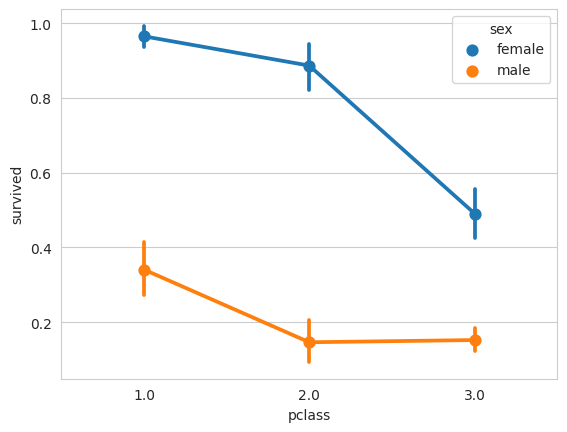

In [ ]:
sns.pointplot(x = 'pclass',y = 'survived',hue='sex',data=data)
plt.show()

## Age = Continuous Factor


First going to look at the age distributions

In [ ]:
print('Oldest Passenger =', data['age'].max(), 'Years')
print('Youngest Passenger =', data['age'].min(), 'Years')
print('Average age =', data['age'].mean(), 'Years')

Oldest Passenger = 80.0 Years
Youngest Passenger = 0.1667 Years
Average age = 29.8811345124283 Years


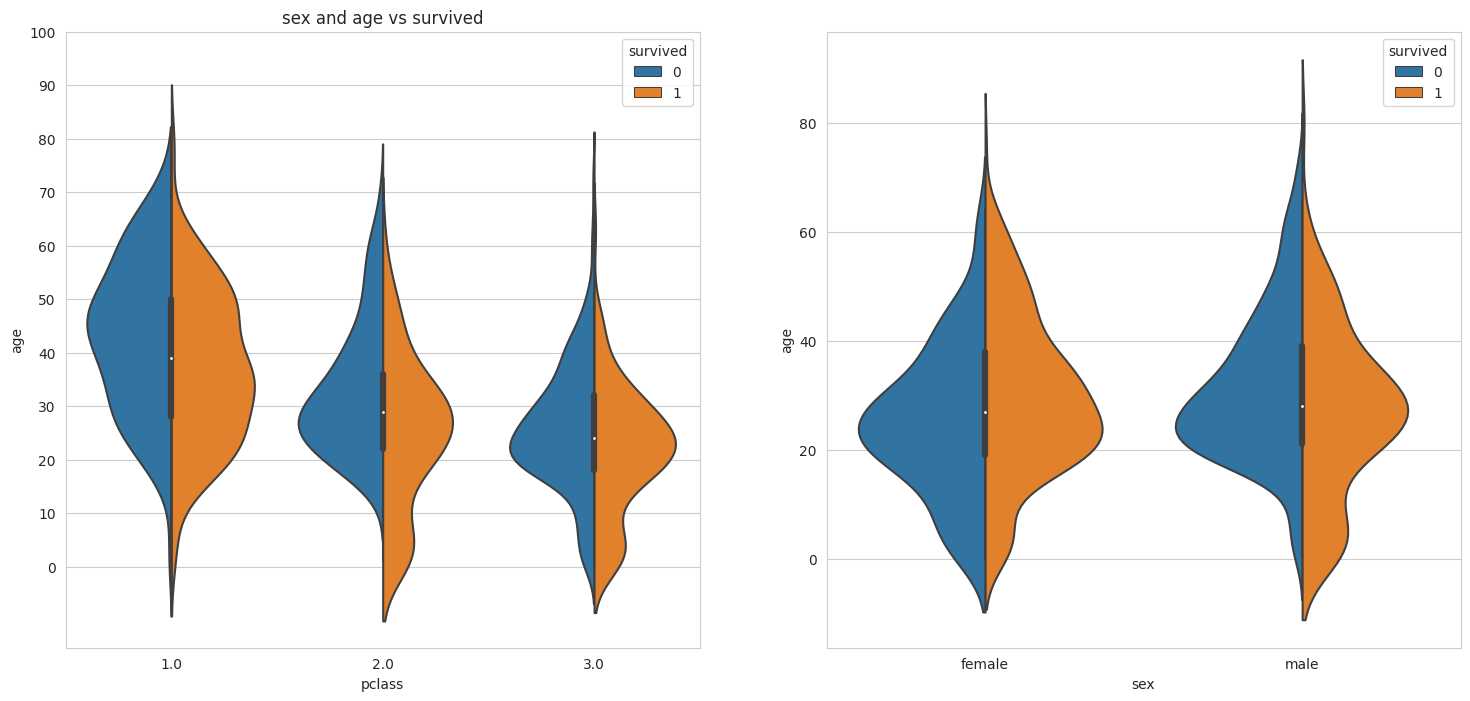

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (18,8))
sns.violinplot(x = 'pclass', y = 'age', hue = 'survived', data = data, split = True, ax = ax[0])
ax[0].set_title('pclass and age vs survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x = 'sex', y = 'age', hue = 'survived', data = data, split = True, ax = ax[1])
ax[0].set_title('sex and age vs survived')
ax[0].set_yticks(range(0,110,10))

**Analysis**
1. There are more children as you increase pclass and below 10 children tend to survived
2. For men survival chances decrease with age

**Fixing age DS**
age has null values. We can replace these with mean age of dataset.

Need to find out which age-band each passenger is in so can assign a more accurate mean age. Can do this by looking at the name feature and see which preposition they have and assign the mean values for this

In [ ]:
#Extracts the preopositions
data['Initial'] = 0
for i in data:
    data['Initial'] = data.name.str.extract('([A-Za-z]+)\.')

In [ ]:
pd.crosstab(data.Initial, data.sex, margins = True).T.style.background_gradient(cmap = 'summer_r')

Can see there are some misspelled initials like Mlle or Mme that stand for Miss. Will replcae them with relevent

In [ ]:
data['Initial'].replace(['Mlle', 'Mme','Ms', 'Dr','Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don'], ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'], inplace = True)

In [ ]:
data.groupby('Initial')['age'].mean()

Initial
Dona      39.000000
Master     5.482704
Miss      21.834502
Mr        32.545531
Mrs       37.034884
Other     44.923077
Name: age, dtype: float64

### Filling NaN ages with Mean

In [ ]:
data.loc[(data.age.isnull()) & (data.Initial == 'Mr'), 'age'] = 33
data.loc[(data.age.isnull()) & (data.Initial == 'Mrs'), 'age'] = 36
data.loc[(data.age.isnull()) & (data.Initial == 'Master'), 'age'] = 5
data.loc[(data.age.isnull()) & (data.Initial == 'Miss'), 'age'] = 22
data.loc[(data.age.isnull()) & (data.Initial == 'Other'), 'age'] = 46

In [ ]:
data.age.isnull().any()

False

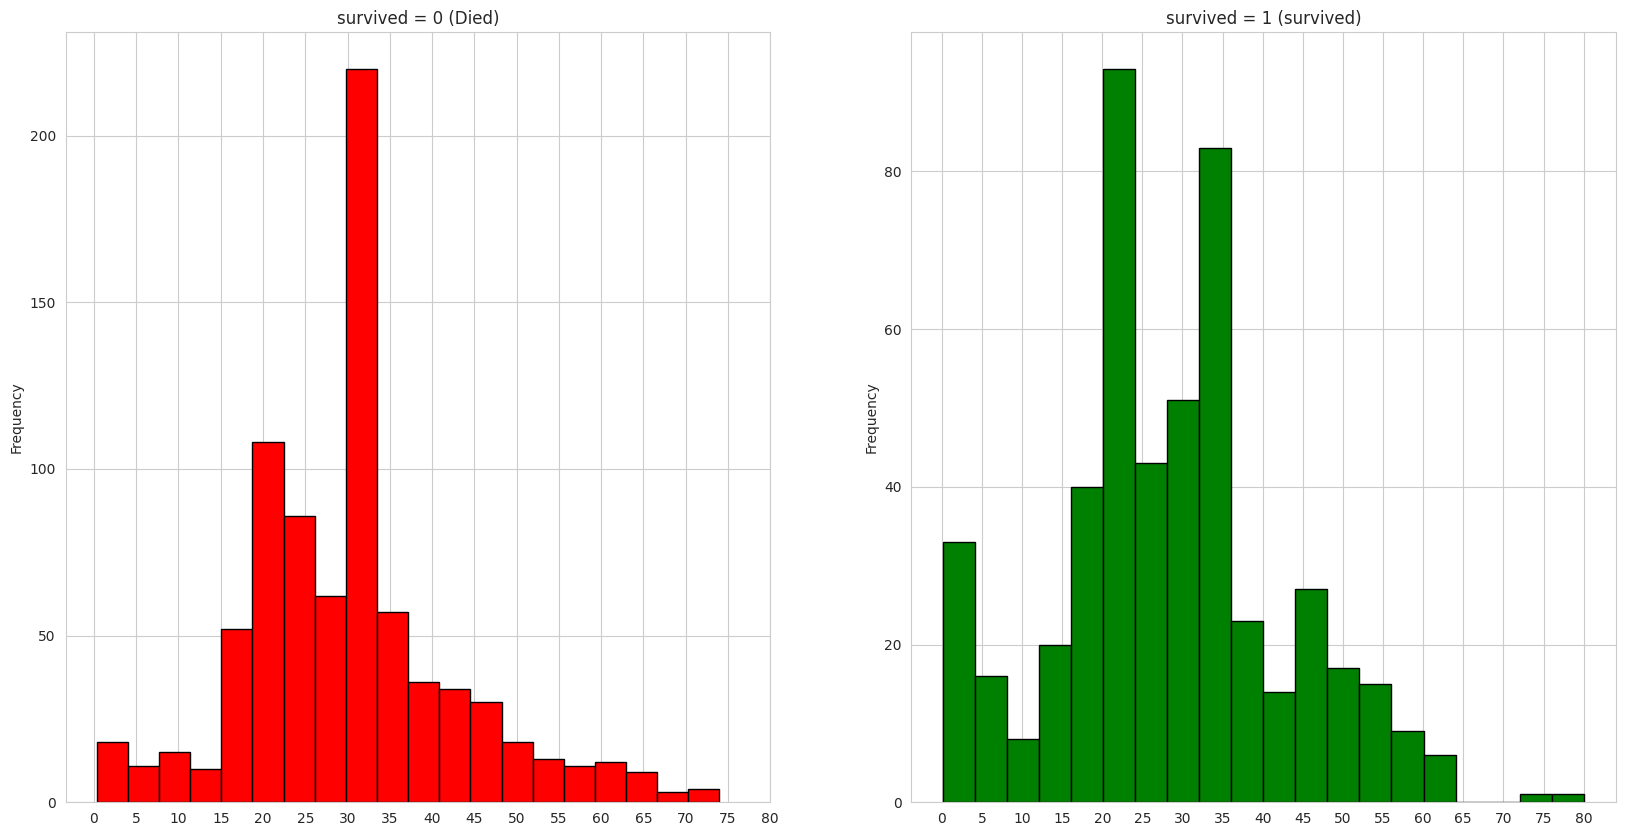

In [ ]:
f,ax = plt.subplots(1, 2, figsize = (20, 10))
data[data['survived'] == 0].age.plot.hist(ax = ax[0], bins = 20, edgecolor = 'black', color = 'red')
ax[0].set_title('survived = 0 (Died)')
x1 = list(range(0, 85, 5))
ax[0].set_xticks(x1)
data[data['survived'] == 1].age.plot.hist(ax = ax[1], bins = 20, edgecolor = 'black', color = 'green')
ax[1].set_title('survived = 1 (survived)')
x2 = list(range(0, 85, 5))
ax[1].set_xticks(x2)
plt.show()

**Observations**
    
        1, age < 5 and 20-25 and 30-35 were saved in large Numbers
        2, Oldest passenger saved was 75,80 years old
        3, The most death also occured between 30-35

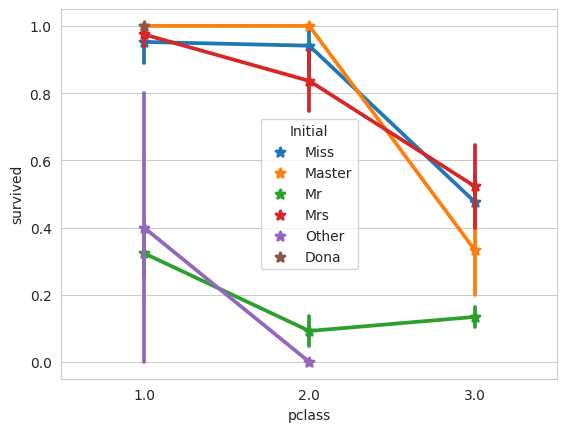

In [ ]:
ax = sns.pointplot(x = 'pclass',y = 'survived',hue ='Initial',data=data, markers = '*')
plt.show()

In [ ]:
# embarked from (Port)

In [ ]:
pd.crosstab([data.embarked, data.pclass], [data.sex, data.survived], margins = True).style.background_gradient(cmap = 'YlOrRd')

There were 3 ports that were embarked from
            
            1, C
            2, Q
            3, S

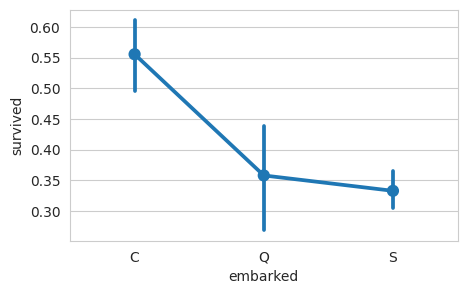

embarked
C    0.555556
Q    0.357724
S    0.332604
Name: survived, dtype: float64

In [ ]:
sns.pointplot(x = 'embarked', y = data['survived'], data = data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()
data.groupby('embarked')['survived'].mean()

As we can see the chances of survival are highest when embarked from **C = 0.55** and lowest from **S = 0.33**


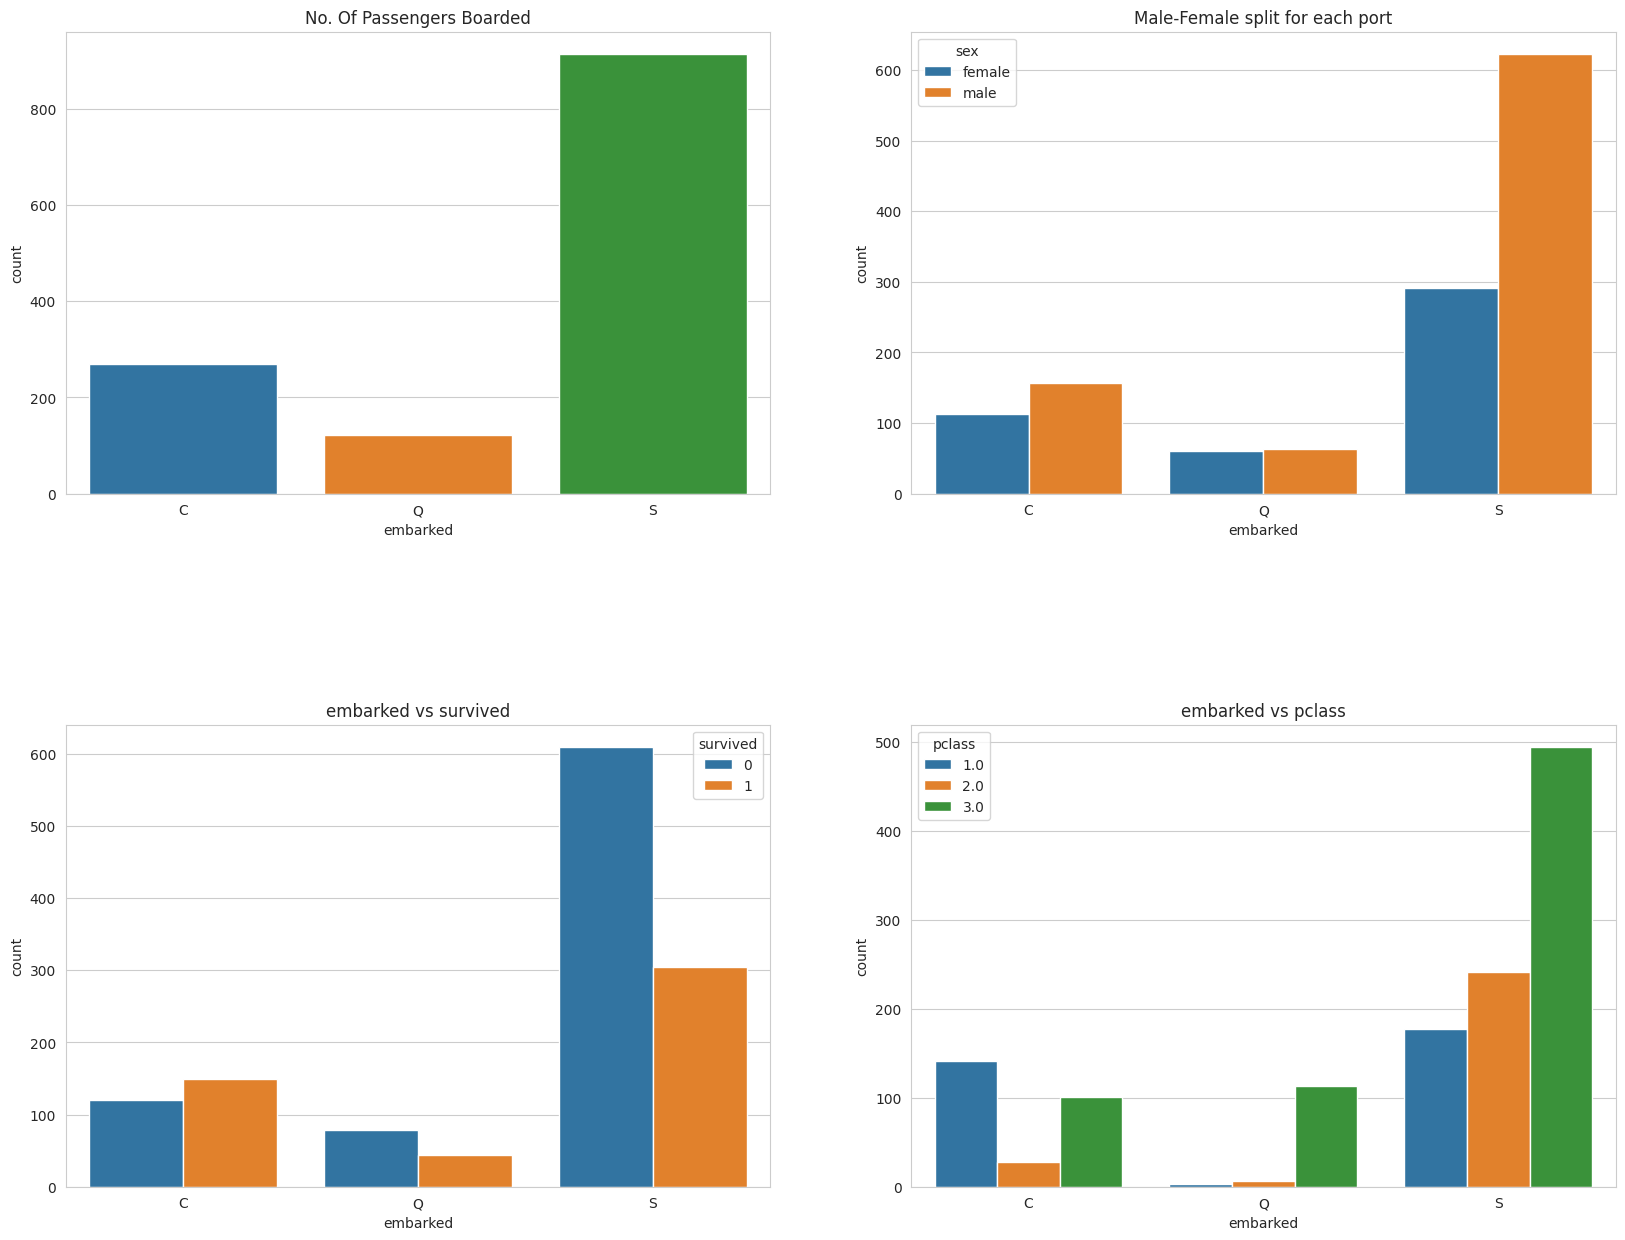

In [ ]:
f, ax = plt.subplots(2, 2, figsize = (20,15))
sns.countplot(x = 'embarked', data = data, ax = ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot(x = 'embarked', hue = 'sex'
              , data = data, ax = ax[0,1])
ax[0,1].set_title('Male-Female split for each port')
sns.countplot(x = 'embarked', hue = 'survived', data = data, ax = ax[1,0])
ax[1,0].set_title('embarked vs survived')
sns.countplot(x = 'embarked', hue = 'pclass', data = data, ax = ax[1,1])
ax[1,1].set_title('embarked vs pclass')
plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()

### Observations:

            1, Most passengers boarded from S and most of them were pclass  3
            2, Boarding from C gave highest survival chance and pclass 1 and 3 dominated C
            3, From Q Almost all were pclass 3
            4, Mostly Males from S and they had a very low survival rate, this coule be the case

In [ ]:
data.isnull().sum()

pclass          0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
survived        0
Initial         0
dtype: int64

Embarked and fare only total 3 rows containing null value we delete it


In [ ]:
data.dropna(subset=['fare', 'embarked'], inplace=True)

In [ ]:
data.isnull().sum()

pclass          0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
cabin        1013
embarked        0
boat          822
body         1186
home.dest     562
survived        0
Initial         0
dtype: int64

# SibSip

In [ ]:
pd.crosstab([data.sibsp], data.survived).style.background_gradient(cmap = 'summer_r')

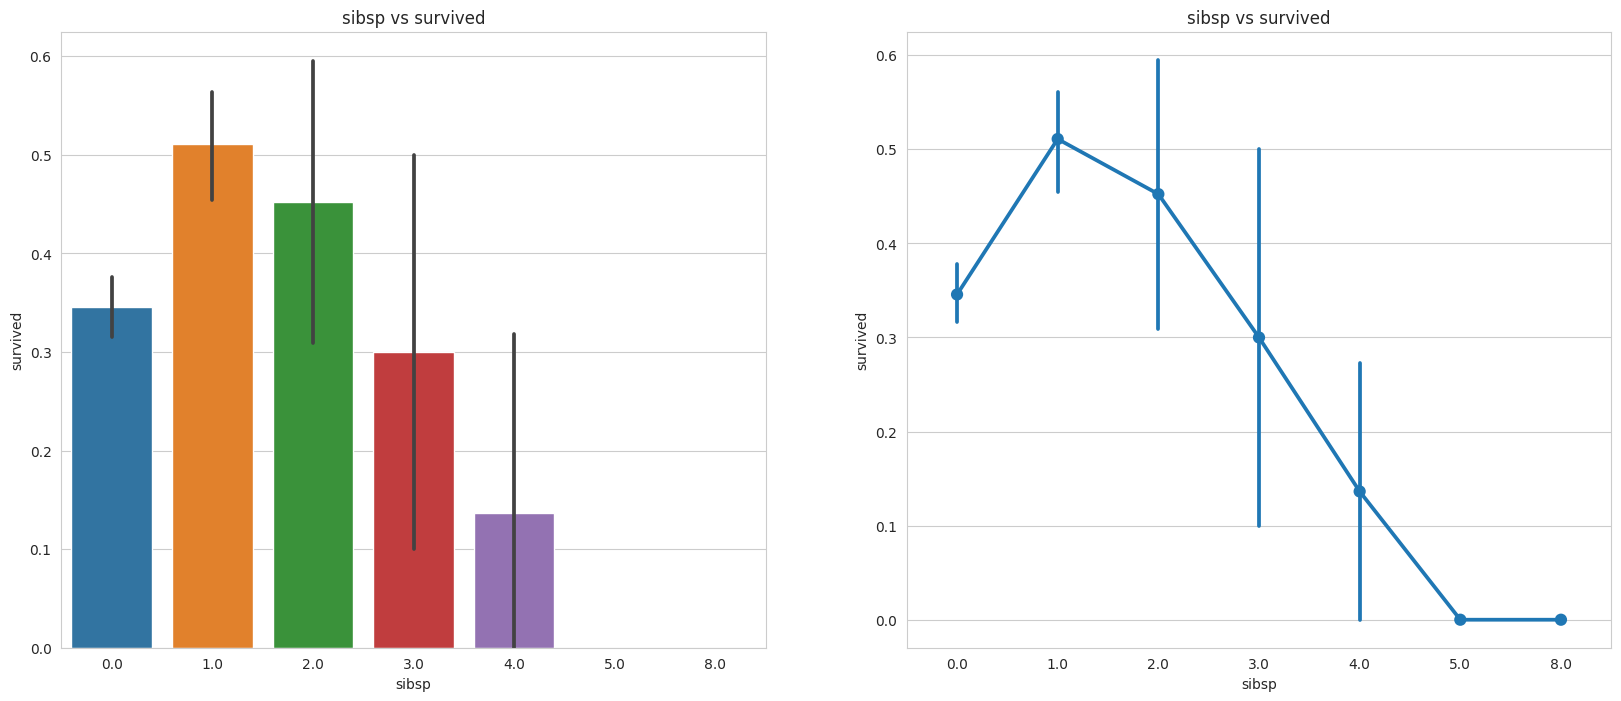

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (20,8))
sns.barplot(x = 'sibsp', y = 'survived', data= data, ax = ax[0])
ax[0].set_title('sibsp vs survived')
sns.pointplot(x = 'sibsp',y = 'survived', data = data, ax = ax[1])
ax[1].set_title('sibsp vs survived')
plt.close(2)
plt.show()

In [ ]:
pd.crosstab(data.sibsp, data.pclass).style.background_gradient(cmap = 'summer_r')

The barplot and pointplot shows that if alone with 0, survival rate 34.5%. If more siblings in general chance of survival decreases as try to save family members.Family 5-8 have 0 survived, this is due to pclass as you can see all pclass 3 which have lowest survival rate

# fare

In [ ]:
print('Highest fare was:', data['fare'].max())
print('Lowest fare was:', data['fare'].min())
print('Average fare was:', data['fare'].mean())

Highest fare was: 512.3292
Lowest fare was: 0.0
Average fare was: 33.22395627871363


maybe free tickets costs zero so couldnot drop those values

# Correlation Between The Features

We dont want target variable in correlation matrix so

In [ ]:
data['survived'] = data['survived'].astype(str)

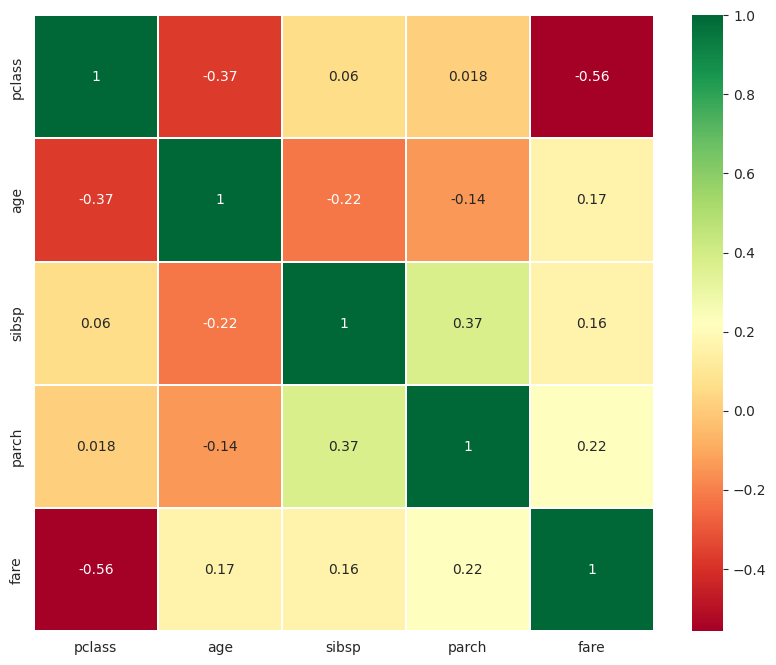

In [ ]:
sns.heatmap(data.select_dtypes(include = ['float', 'int']).corr(), annot = True, cmap = 'RdYlGn', linewidths = 0.2)
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

From the above heatmap,we can see that the features are not much correlated. The highest correlation is between pclass and fare i.e 0.56. So we can drop either one of them

## age_Band

Binning into 5 bins => 80/5 = 16 therefore the bins have size 16

In [ ]:
data['age_band'] = 0
data.loc[data['age'] <= 16, 'age_band'] = 0
data.loc[(data['age'] > 16) & (data['age'] <=32), 'age_band'] = 1
data.loc[(data['age'] > 32) & (data['age'] <=48), 'age_band'] = 2
data.loc[(data['age'] > 48) & (data['age'] <=64), 'age_band'] = 3
data.loc[data['age'] > 64, 'age_band'] = 4
data.head(2)

pclass                            name     sex      age  sibsp  parch  \
0     1.0   Allen, Miss. Elisabeth Walton  female  29.0000    0.0    0.0   
1     1.0  Allison, Master. Hudson Trevor    male   0.9167    1.0    2.0   

   ticket      fare    cabin embarked boat  body  \
0   24160  211.3375       B5        S    2  None   
1  113781  151.5500  C22 C26        S   11   NaN   

                         home.dest survived Initial  age_band  
0                     St Louis, MO        1    Miss         1  
1  Montreal, PQ / Chesterville, ON        1  Master         0

In [ ]:
data['age_band'].value_counts().to_frame().style.background_gradient(cmap = 'summer_r')

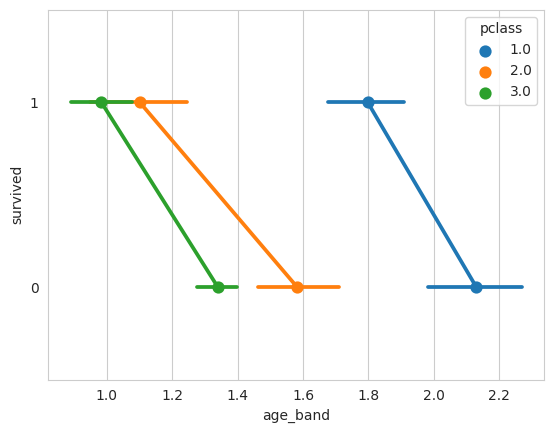

In [ ]:
sns.pointplot(x = 'age_band', y = 'survived', data = data, hue = 'pclass')
plt.show()

Survival rate decreases with increasing age for all pclasses

creating new features 'Family_size' and 'Alone'. This feature is summation of parch and sibsp. Check if survival rate has anything to do with family saze of passengers. Alone will denote if alone or not

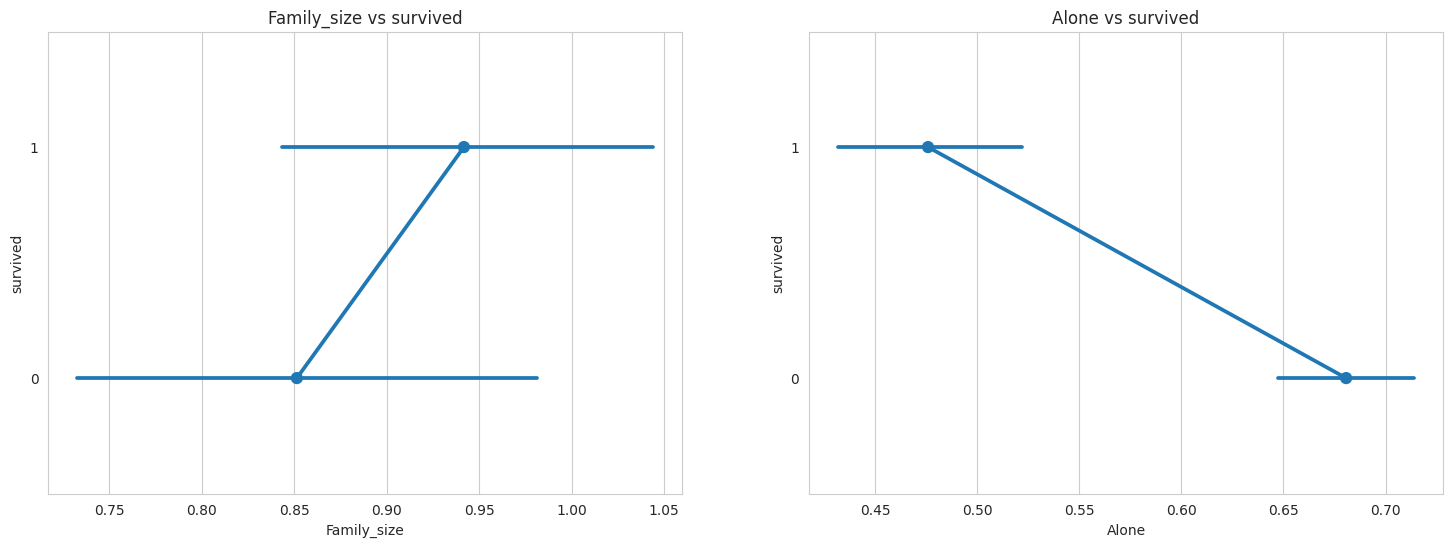

In [ ]:
data['Family_size'] = 0
data['Family_size'] = data['parch'] + data['sibsp']
data['Alone'] = 0
data.loc[data.Family_size == 0, 'Alone'] = 1

f, ax = plt.subplots(1,2, figsize = (18,6))
sns.pointplot(x = 'Family_size', y = 'survived', data = data, ax = ax[0])
ax[0].set_title('Family_size vs survived')
sns.pointplot(x = 'Alone', y = 'survived', data = data, ax = ax[1])
ax[1].set_title('Alone vs survived')
plt.close(2)
plt.close(3)
plt.show()

If alone chances of survival is low, and if family size >= 4 the chances decrease to. This looks to be important ferature


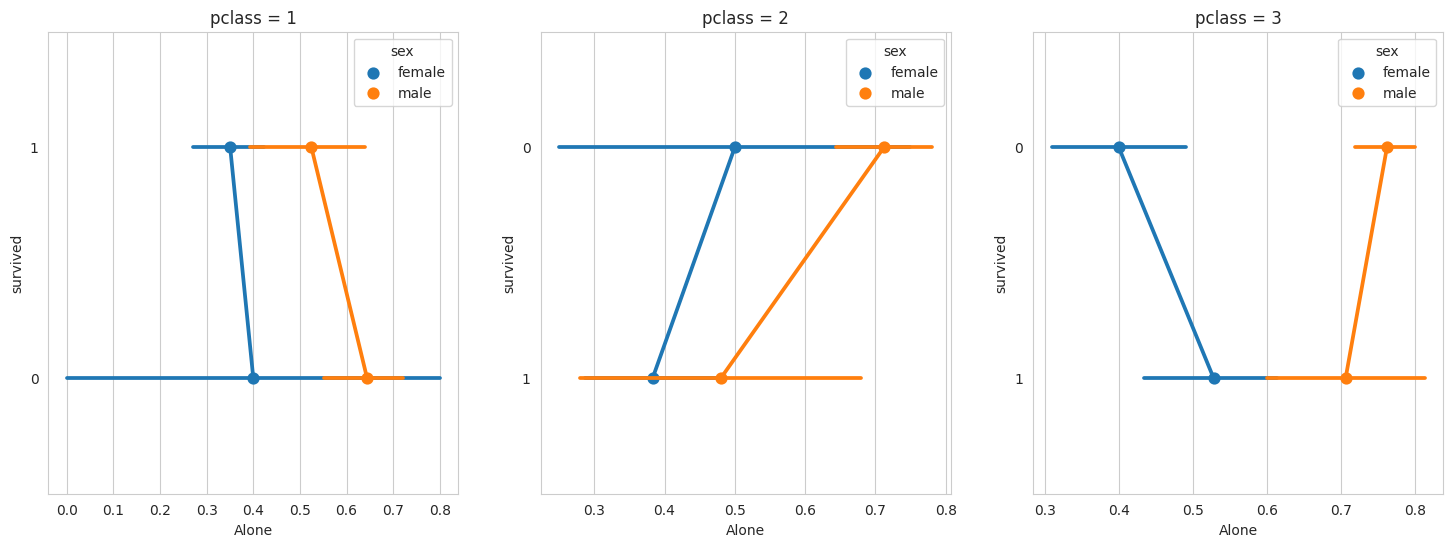

In [ ]:
f, ax = plt.subplots(1, 3, figsize = (18,6))
sns.pointplot(x = 'Alone', y = 'survived', data = data[data['pclass'] == 1], hue = 'sex', ax = ax[0])
ax[0].set_title('pclass = 1')
sns.pointplot(x = 'Alone', y = 'survived', data = data[data['pclass'] == 2], hue = 'sex', ax = ax[1])
ax[1].set_title('pclass = 2')
sns.pointplot(x = 'Alone', y = 'survived', data = data[data['pclass'] == 3], hue = 'sex', ax = ax[2])
ax[2].set_title('pclass = 3')
plt.show()

Only case where being alone is good is pclass 3 for women

## fare_Range

usinge **pandas.cqut** we can split the continuous fares into number of bins set

In [ ]:
data['fare_range'] = pd.qcut(data['fare'], 4)
data.groupby(['fare_range'])['survived'].mean().to_frame().style.background_gradient('summer_r')

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3933: RuntimeWarning:

invalid value encountered in double_scalars



In [ ]:
data['fare_cat'] = 0
data.loc[data['fare'] <= 7.91, 'fare_cat'] = 0
data.loc[(data['fare'] > 7.91) & (data['fare'] < 14.454 ), 'fare_cat'] = 1
data.loc[(data['fare'] > 14.454) & (data['fare'] < 31 ), 'fare_cat'] = 2
data.loc[(data['fare'] > 31) & (data['fare'] <= 513), 'fare_cat'] = 3

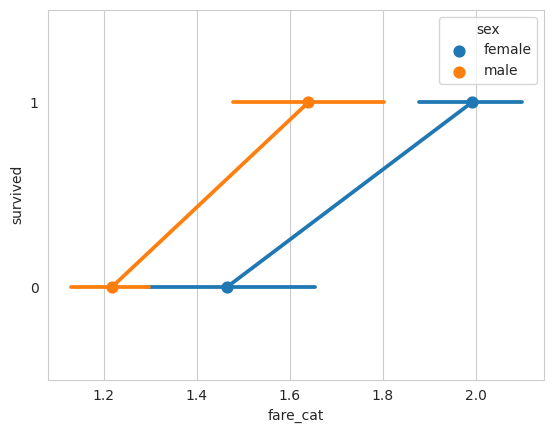

In [ ]:
sns.pointplot(x = 'fare_cat', y = 'survived', data = data, hue = 'sex')
plt.show()

## Converting strings to Numeric Features

In [ ]:
data['sex'].replace(['male', 'female'], [0,1], inplace = True)
data['embarked'].replace(['S','C','Q'], [0,1,2], inplace = True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'], [0,1,2,3,4], inplace = True)

In [ ]:
data.head(20)

pclass                                               name sex      age  \
0      1.0                      Allen, Miss. Elisabeth Walton   1  29.0000   
1      1.0                     Allison, Master. Hudson Trevor   0   0.9167   
2      1.0                       Allison, Miss. Helen Loraine   1   2.0000   
3      1.0               Allison, Mr. Hudson Joshua Creighton   0  30.0000   
4      1.0    Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   1  25.0000   
5      1.0                                Anderson, Mr. Harry   0  48.0000   
6      1.0                  Andrews, Miss. Kornelia Theodosia   1  63.0000   
7      1.0                             Andrews, Mr. Thomas Jr   0  39.0000   
8      1.0      Appleton, Mrs. Edward Dale (Charlotte Lamson)   1  53.0000   
9      1.0                            Artagaveytia, Mr. Ramon   0  71.0000   
10     1.0                             Astor, Col. John Jacob   0  47.0000   
11     1.0  Astor, Mrs. John Jacob (Madeleine Talmadge Force)   1  18.0000   
12     1.0                      Aubart, Mme. Leontine Pauline   1  24.0000   
13     1.0                       Barber, Miss. Ellen 'Nellie'   1  26.0000   
14     1.0               Barkworth, Mr. Algernon Henry Wilson   0  80.0000   
15     1.0                                Baumann, Mr. John D   0  33.0000   
16     1.0                           Baxter, Mr. Quigg Edmond   0  24.0000   
17     1.0    Baxter, Mrs. James (Helene DeLaudeniere Chaput)   1  50.0000   
18     1.0                              Bazzani, Miss. Albina   1  32.0000   
19     1.0                               Beattie, Mr. Thomson   0  36.0000   

    sibsp  parch    ticket      fare    cabin embarked  boat   body  \
0     0.0    0.0     24160  211.3375       B5        0     2   None   
1     1.0    2.0    113781  151.5500  C22 C26        0    11    NaN   
2     1.0    2.0    113781  151.5500  C22 C26        0  None    NaN   
3     1.0    2.0    113781  151.5500  C22 C26        0  None  135.0   
4     1.0    2.0    113781  151.5500  C22 C26        0  None    NaN   
5     0.0    0.0     19952   26.5500      E12        0     3    NaN   
6     1.0    0.0     13502   77.9583       D7        0    10    NaN   
7     0.0    0.0    112050    0.0000      A36        0  None    NaN   
8     2.0    0.0     11769   51.4792     C101        0     D    NaN   
9     0.0    0.0  PC 17609   49.5042     None        1  None   22.0   
10    1.0    0.0  PC 17757  227.5250  C62 C64        1  None  124.0   
11    1.0    0.0  PC 17757  227.5250  C62 C64        1     4    NaN   
12    0.0    0.0  PC 17477   69.3000      B35        1     9    NaN   
13    0.0    0.0     19877   78.8500     None        0     6    NaN   
14    0.0    0.0     27042   30.0000      A23        0     B    NaN   
15    0.0    0.0  PC 17318   25.9250     None        0  None    NaN   
16    0.0    1.0  PC 17558  247.5208  B58 B60        1  None    NaN   
17    0.0    1.0  PC 17558  247.5208  B58 B60        1     6    NaN   
18    0.0    0.0     11813   76.2917      D15        1     8    NaN   
19    0.0    0.0     13050   75.2417       C6        1     A    NaN   

                          home.dest survived Initial  age_band  Family_size  \
0                      St Louis, MO        1       2         1          0.0   
1   Montreal, PQ / Chesterville, ON        1       3         0          3.0   
2   Montreal, PQ / Chesterville, ON        0       2         0          3.0   
3   Montreal, PQ / Chesterville, ON        0       0         1          3.0   
4   Montreal, PQ / Chesterville, ON        0       1         1          3.0   
5                      New York, NY        1       0         2          0.0   
6                        Hudson, NY        1       2         3          1.0   
7                       Belfast, NI        0       0         2          0.0   
8               Bayside, Queens, NY        1       1         3          2.0   
9               Montevideo, Uruguay        0       0         4          0.0   
10  

In [ ]:
data.isnull().sum()

pclass            0
name              0
sex               0
age               0
sibsp             0
parch             0
ticket            0
fare              0
cabin          1013
embarked          0
boat            822
body           1186
home.dest       562
survived          0
Initial           0
age_band          0
Family_size       0
Alone             0
fare_range        0
fare_cat          0
dtype: int64

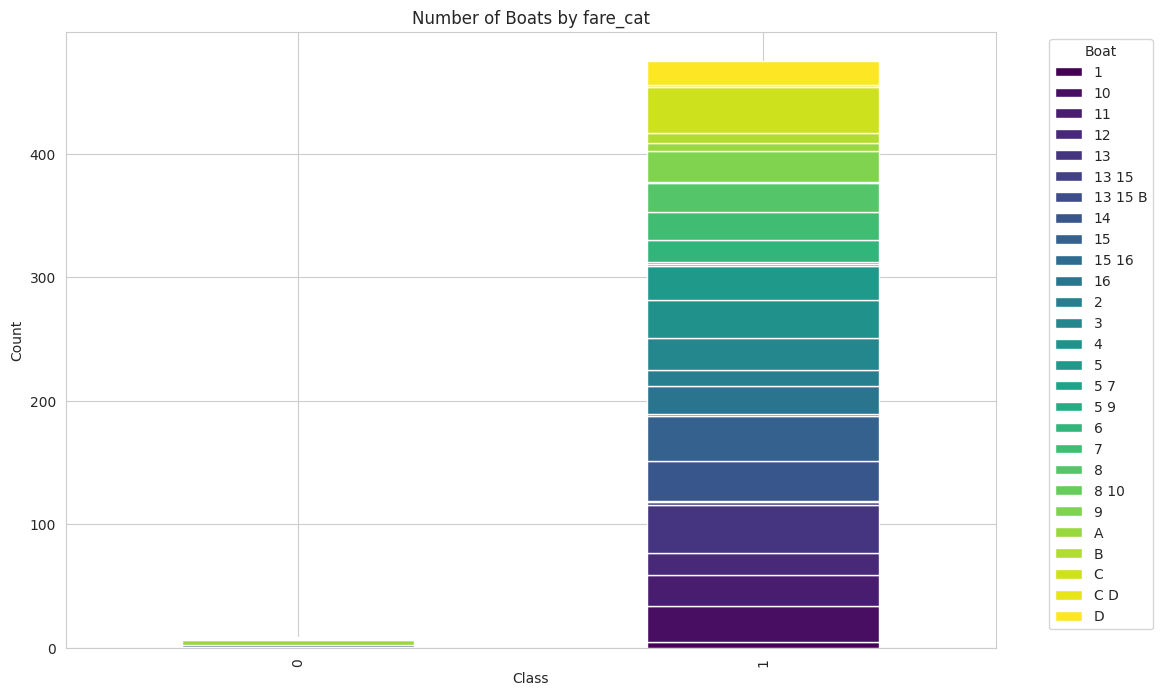

In [ ]:
boat_class_counts = df.groupby(['survived', 'boat']).size().unstack()

# Plotting the grouped bar chart
ax = boat_class_counts.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')

# Adding labels and title
plt.title('Number of Boats by fare_cat')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend(title='Boat', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

having boat meaning survived

In [ ]:
data8=data.copy()

In [ ]:
data.head()

pclass                                             name sex      age  \
0     1.0                    Allen, Miss. Elisabeth Walton   1  29.0000   
1     1.0                   Allison, Master. Hudson Trevor   0   0.9167   
2     1.0                     Allison, Miss. Helen Loraine   1   2.0000   
3     1.0             Allison, Mr. Hudson Joshua Creighton   0  30.0000   
4     1.0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   1  25.0000   

   sibsp  parch  ticket      fare    cabin embarked  boat   body  \
0    0.0    0.0   24160  211.3375       B5        0     2   None   
1    1.0    2.0  113781  151.5500  C22 C26        0    11    NaN   
2    1.0    2.0  113781  151.5500  C22 C26        0  None    NaN   
3    1.0    2.0  113781  151.5500  C22 C26        0  None  135.0   
4    1.0    2.0  113781  151.5500  C22 C26        0  None    NaN   

                         home.dest survived Initial  age_band  Family_size  \
0                     St Louis, MO        1       2         1          0.0   
1  Montreal, PQ / Chesterville, ON        1       3         0          3.0   
2  Montreal, PQ / Chesterville, ON        0       2         0          3.0   
3  Montreal, PQ / Chesterville, ON        0       0         1          3.0   
4  Montreal, PQ / Chesterville, ON        0       1         1          3.0   

   Alone         fare_range  fare_cat  
0      1  (31.275, 512.329]         3  
1      0  (31.275, 512.329]         3  
2      0  (31.275, 512.329]         3  
3      0  (31.275, 512.329]         3  
4      0  (31.275, 512.329]         3

In [ ]:
# Replacing only None with 0 in a specific column (e.g., 'Column1')
data['boat'] = data['boat'].apply(lambda x: 0 if x is None else x)

data.head(3)

pclass                            name sex      age  sibsp  parch  ticket  \
0     1.0   Allen, Miss. Elisabeth Walton   1  29.0000    0.0    0.0   24160   
1     1.0  Allison, Master. Hudson Trevor   0   0.9167    1.0    2.0  113781   
2     1.0    Allison, Miss. Helen Loraine   1   2.0000    1.0    2.0  113781   

       fare    cabin embarked boat  body                        home.dest  \
0  211.3375       B5        0    2  None                     St Louis, MO   
1  151.5500  C22 C26        0   11   NaN  Montreal, PQ / Chesterville, ON   
2  151.5500  C22 C26        0    0   NaN  Montreal, PQ / Chesterville, ON   

  survived Initial  age_band  Family_size  Alone         fare_range  fare_cat  
0        1       2         1          0.0      1  (31.275, 512.329]         3  
1        1       3         0          3.0      0  (31.275, 512.329]         3  
2        0       2         0          3.0      0  (31.275, 512.329]         3

Since body has many null values we drop body and home.dest has so many unique values

In [ ]:
data.drop(['body','home.dest'], axis = 1, inplace = True)

In [ ]:
data.head(3)

pclass                            name sex      age  sibsp  parch  ticket  \
0     1.0   Allen, Miss. Elisabeth Walton   1  29.0000    0.0    0.0   24160   
1     1.0  Allison, Master. Hudson Trevor   0   0.9167    1.0    2.0  113781   
2     1.0    Allison, Miss. Helen Loraine   1   2.0000    1.0    2.0  113781   

       fare    cabin embarked boat survived Initial  age_band  Family_size  \
0  211.3375       B5        0    2        1       2         1          0.0   
1  151.5500  C22 C26        0   11        1       3         0          3.0   
2  151.5500  C22 C26        0    0        0       2         0          3.0   

   Alone         fare_range  fare_cat  
0      1  (31.275, 512.329]         3  
1      0  (31.275, 512.329]         3  
2      0  (31.275, 512.329]         3

In [ ]:
data15=data.copy()

In [ ]:
data['boat'] = data['boat'].apply(lambda x: 0 if x == 0 else 1)

In [ ]:
data.head(3)

pclass                            name sex      age  sibsp  parch  ticket  \
0     1.0   Allen, Miss. Elisabeth Walton   1  29.0000    0.0    0.0   24160   
1     1.0  Allison, Master. Hudson Trevor   0   0.9167    1.0    2.0  113781   
2     1.0    Allison, Miss. Helen Loraine   1   2.0000    1.0    2.0  113781   

       fare    cabin embarked  boat survived Initial  age_band  Family_size  \
0  211.3375       B5        0     1        1       2         1          0.0   
1  151.5500  C22 C26        0     1        1       3         0          3.0   
2  151.5500  C22 C26        0     0        0       2         0          3.0   

   Alone         fare_range  fare_cat  
0      1  (31.275, 512.329]         3  
1      0  (31.275, 512.329]         3  
2      0  (31.275, 512.329]         3

In [ ]:
data.dtypes

pclass          float64
name             object
sex            category
age             float64
sibsp           float64
parch           float64
ticket           object
fare            float64
cabin            object
embarked       category
boat              int64
survived         object
Initial          object
age_band          int64
Family_size     float64
Alone             int64
fare_range     category
fare_cat          int64
dtype: object

<ipython-input-66-b9095d38bbc3>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

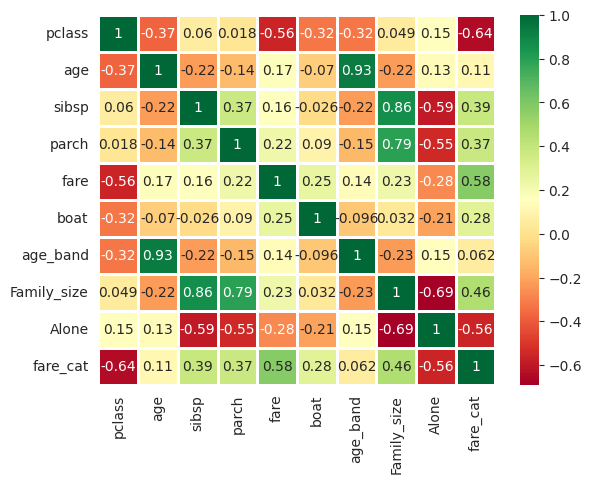

In [ ]:
sns.heatmap(data.corr(), annot = True, cmap = 'RdYlGn', linewidths = 0.9, annot_kws = {'size':10})

**fare**,**pclass**
ageband,**age**
familysize,**sibsp,parch**
**Alone**,sibsp,parch,familysize
fare_cat,pclass,alone are corelated

In [ ]:
data.drop(['fare', 'pclass', 'age', 'sibsp', 'parch', 'Alone'], axis = 1, inplace = True)

<ipython-input-68-b9095d38bbc3>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

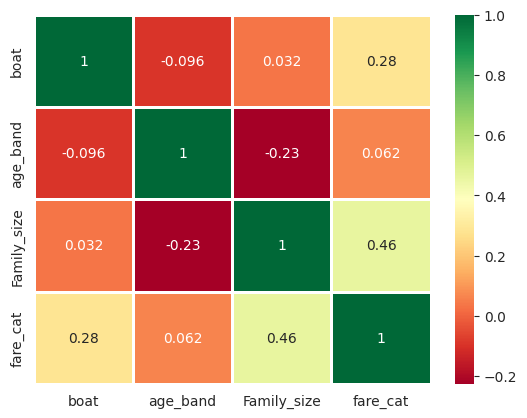

In [ ]:
sns.heatmap(data.corr(), annot = True, cmap = 'RdYlGn', linewidths = 0.9, annot_kws = {'size':10})

In [ ]:
data.drop(['name', 'ticket',  'cabin', 'fare_range'], axis = 1, inplace = True)

couldnt find a way to impute the values

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   sex          1306 non-null   category
 1   embarked     1306 non-null   category
 2   boat         1306 non-null   int64   
 3   survived     1306 non-null   object  
 4   Initial      1306 non-null   object  
 5   age_band     1306 non-null   int64   
 6   Family_size  1306 non-null   float64 
 7   fare_cat     1306 non-null   int64   
dtypes: category(2), float64(1), int64(3), object(2)
memory usage: 74.2+ KB


In [ ]:
data['survived'] = data['survived'].astype('int64')

In [ ]:
y=data['survived']
X = data.drop('survived', axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: survived, dtype: int64

In [ ]:
X.head()

sex embarked  boat Initial  age_band  Family_size  fare_cat
0   1        0     1       2         1          0.0         3
1   0        0     1       3         0          3.0         3
2   1        0     0       2         0          3.0         3
3   0        0     0       0         1          3.0         3
4   1        0     0       1         1          3.0         3

In [ ]:
X.dtypes

sex            category
embarked       category
boat              int64
Initial          object
age_band          int64
Family_size     float64
fare_cat          int64
dtype: object

In [ ]:
X.isnull().sum()

sex            0
embarked       0
boat           0
Initial        0
age_band       0
Family_size    0
fare_cat       0
dtype: int64

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
# We create the preprocessing pipelines for both numeric and categorical data.
numeric_features = ['age_band', 'fare_cat', 'boat']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

In [ ]:
categorical_features = ['sex']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [ ]:
# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

In [ ]:
pipe.fit(X_train, y_train)
print("model score: %.3f" % pipe.score(X_test, y_test))

model score: 0.977


In [ ]:
# Grid Search CV

param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'classifier__C': [0.1, 1.0, 10, 100],
}


In [ ]:
grid_search = GridSearchCV(pipe, param_grid, cv=10)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age_band',
                                                                          'fare_cat',
                                                                          'boat']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['sex'])])),
                                       ('classifier', LogisticRegression())]),
             param_grid={'classifier__C': [0.1, 1.0, 10, 100],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']})

In [ ]:
print(("best logistic regression from grid search: %.3f"
       % grid_search.score(X_test, y_test)))

best logistic regression from grid search: 0.977


In [ ]:
from sklearn.metrics import f1_score

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Predictions on the test set
y_pred = pipe.predict(X_test)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)

# Print the F1 score
print("F1 score: %.3f" % f1)

F1 score: 0.970


In [ ]:
from sklearn.datasets import load_iris  # Replace with your actual data
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Print the best parameters
print("Best parameters:", grid_search.best_params_)

# Access the best features (assuming 'classifier' step has a feature_importances_ or coef_ attribute)
best_features = grid_search.best_estimator_['classifier'].coef_  # Replace with appropriate attribute
print("Best features:", best_features)

Best parameters: {'classifier__C': 0.1, 'preprocessor__num__imputer__strategy': 'mean'}
Best features: [[-0.05759572  0.09720947  2.68838112 -0.76392677  0.76389737]]


# **Accuracy Score for Logistic Regression is 0.977 and F1 score is 0.970**